In [1]:
import fastbook
fastbook.setup_book()

/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
from fastai.data.external import untar_data,URLs
from fastai.data.transforms import get_image_files

In [5]:
import timm
import gradio as gr

In [6]:
path = Path("stage1/") #started typing and did autocomplete

In [7]:
files = get_image_files(path/'food waste')

In [8]:
parent_label(files[0]) #food waste

'food waste'

In [9]:
import PIL

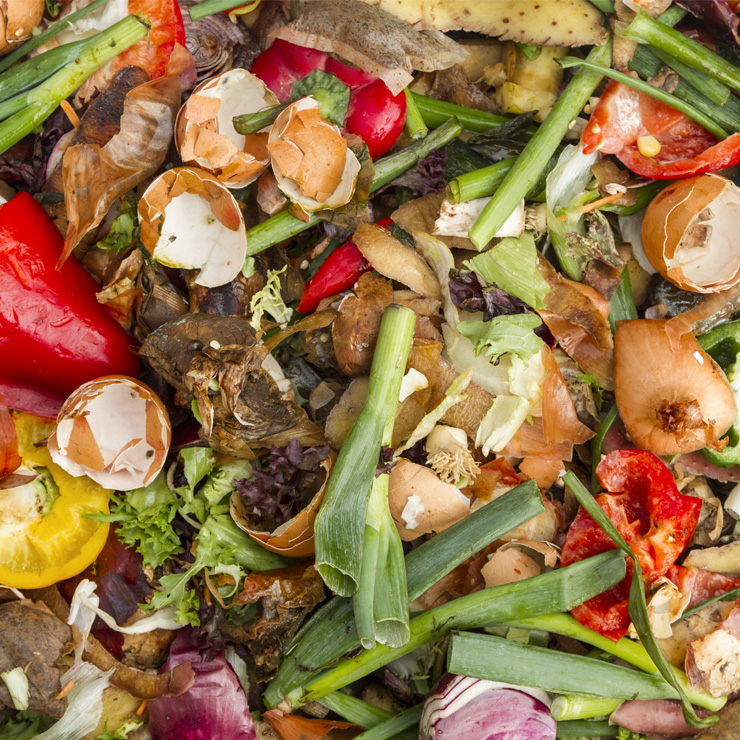

In [10]:
img = PIL.Image.open(files[0])
img

In [11]:
device = {'cuda:0' if torch.cuda.is_available() else 'cpu'}
device

{'cuda:0'}

In [12]:
torch.cuda.is_available()

True

In [13]:
trash_types = 'discarded clothing', 'food waste', 'plastic bags', 'recyc_no_scrap', 'scrap metal piece', 'wood scraps'

In [14]:
if not path.exists():
    print("No path")
    path.mkdir() #existed
#Made the empty folders below
for t in trash_types:
    dest = (path/t)
    dest.mkdir(exist_ok=True) 


In [15]:
fns = get_image_files(path)
fns

(#1509) [Path('stage1/plastic bags/00000024.jpeg'),Path('stage1/plastic bags/00000174.jpg'),Path('stage1/plastic bags/00000307.jpg'),Path('stage1/plastic bags/00000281.jpg'),Path('stage1/plastic bags/00000189.jpg'),Path('stage1/plastic bags/00000295.jpg'),Path('stage1/plastic bags/00000074.jpg'),Path('stage1/plastic bags/00000277.jpg'),Path('stage1/plastic bags/00000081.jpg'),Path('stage1/plastic bags/00000328.jpg')...]

In [16]:
failed = verify_images(fns)

In [17]:
failed

(#0) []

# Resnet34 version

In [18]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items =get_image_files,
        splitter = RandomSplitter(valid_pct=0.2, seed=42), #trying to decrease the batch size
        get_y = parent_label, #get label from parent folder
        item_tfms = RandomResizedCrop(224, min_scale=0.5)
).dataloaders(path, device='cuda:0')


In [21]:
save_model = SaveModelCallback(monitor='error_rate', comp=None, min_delta=0.0, fname='stage1', every_epoch=False, at_end=False, with_opt=False, reset_on_fit=True)
cbs = [TrainEvalCallback(),ProgressCallback(),save_model]
learn = vision_learner(dls, resnet34, metrics=error_rate, cbs=cbs)

### Experimenting with the learning rate

/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SuggestedLRs(valley=0.0010000000474974513)

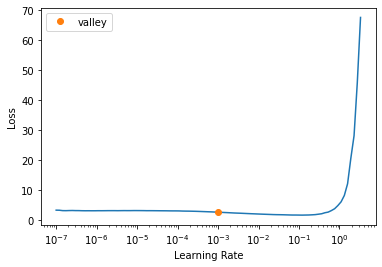

In [22]:
learn.lr_find(stop_div=False, num_it=200) #pp. 209-211 in book

In [24]:
#learn.recorder.plot() #did not appear to be necessary, plot already produced by the code above

In [28]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.841772,0.891112,0.299003,00:12
0,0.841772,0.891112,0.299003,00:12
1,0.876504,0.877942,0.289037,00:12
1,0.876504,0.877942,0.289037,00:12
2,0.881320,0.882706,0.295681,00:12
2,0.881320,0.882706,0.295681,00:12


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Stopped experimenting with learning rate, stick with the defaults for now

In [22]:
learn.fine_tune(20) #10 for quick and dirty

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.452343,0.472268,0.139535,00:12


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 0 with error_rate value: 0.13953489065170288.


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.475172,0.303842,0.116279,00:15
1,0.335115,0.231095,0.079734,00:15
2,0.247257,0.187970,0.066445,00:16
3,0.186637,0.250958,0.073090,00:16
4,0.143001,0.252598,0.079734,00:16
5,0.117995,0.230364,0.066445,00:15
6,0.093277,0.195865,0.056478,00:16
7,0.072012,0.348082,0.079734,00:16
8,0.062958,0.242216,0.063123,00:16
9,0.059760,0.177287,0.059801,00:15


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 0 with error_rate value: 0.11627907305955887.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 1 with error_rate value: 0.07973422110080719.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 2 with error_rate value: 0.06644517928361893.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 6 with error_rate value: 0.05647840350866318.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 14 with error_rate value: 0.04651162773370743.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 15 with error_rate value: 0.04318936914205551.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 epoch 	train_loss 	valid_loss 	error_rate 	time
0 	1.680363 	0.688131 	0.227723 	01:21
epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.816186 	0.587929 	0.203960 	01:25
1 	0.665894 	0.488878 	0.142574 	01:25
2 	0.531409 	0.424168 	0.134653 	01:25
3 	0.408662 	0.435908 	0.132673 	01:25
4 	0.313750 	0.352179 	0.104950 	01:27
5 	0.246948 	0.336746 	0.104950 	01:26
6 	0.191810 	0.341128 	0.099010 	01:28   #saved to model_6.pth, learn how to load it
7 	0.158596 	0.336245 	0.104950 	01:26


 epoch 	train_loss 	valid_loss 	error_rate 	time
0 	1.760472 	0.639008 	0.223762 	01:24
epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.848104 	0.542473 	0.196040 	01:28
1 	0.684445 	0.447180 	0.154455 	01:27
2 	0.573362 	0.472952 	0.144554 	01:26
3 	0.460479 	0.350205 	0.099010 	01:29
4 	0.343618 	0.357197 	0.110891 	01:29
5 	0.264540 	0.375858 	0.124752 	01:26
6 	0.201217 	0.329097 	0.102970 	01:27
7 	0.157736 	0.308786 	0.091089 	01:26
8 	0.134358 	0.308325 	0.095050 	01:28
9 	0.115339 	0.309205 	0.093069 	01:27

##### After training the model, do some image cleaning as in 'Clean up the data an unlink ambiguous/incorrectly labeled images', then rerun before exporting.

### Export Model

In [23]:
learn.export('stage1.pkl')

In [24]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('stage1.pkl')]

In [25]:
#To later load from file
learn_inf = load_learner(path/'stage1.pkl')

In [28]:
learn_inf.predict(path/'stage1ex1.jpeg')

('food waste',
 TensorBase(1),
 TensorBase([6.4921e-07, 9.9999e-01, 4.5347e-07, 3.4147e-06, 2.9363e-06, 3.1090e-08]))

In [29]:
learn_inf.predict(path/'stage1ex2.jpeg')

('scrap metal piece',
 TensorBase(4),
 TensorBase([6.5028e-09, 6.1073e-09, 6.2889e-12, 2.8288e-11, 1.0000e+00, 1.0712e-09]))

In [30]:
learn_inf.predict(path/'stage1ex3.jpeg')

('wood scraps',
 TensorBase(5),
 TensorBase([1.3344e-08, 1.2224e-07, 1.6935e-09, 1.0997e-08, 1.0546e-06, 1.0000e+00]))

In [31]:
learn_inf.dls.vocab

['discarded clothing', 'food waste', 'plastic bags', 'recyc_no_scrap', 'scrap metal piece', 'wood scraps']

In [46]:
#open_image(files[0]).shape

### Clean up the data an unlink ambiguous/incorrectly labeled images

/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


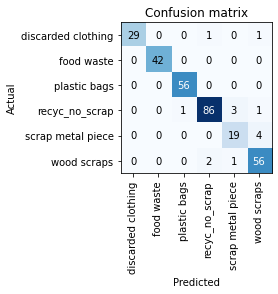

In [48]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [29]:
#CONCLUSION: MODEL UNDERSTANDABLY GETS CONFUSED ABOUT FERROUS/NONFERROUS METAL SCRAPS. THESE WERE NOT IN Cutlip's description->
#may want to remove them for now and stick to Cutlip's story
#ADD GLASS TO THE recyclables CATEGORY FOR stage 1

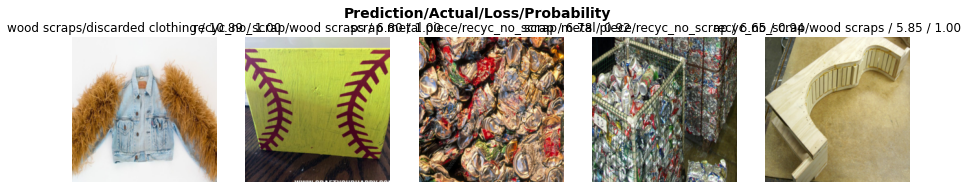

In [49]:
interp.plot_top_losses(5, nrows=1)

In [50]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [53]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [54]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#### Make sure to rerun the data block+loader after unlink

# Explore different architectures

## So far, resnet34 was a better architecture and one I can easily run on my laptop's 4GB GPU.  With better hardware, better model could likely be found. 

In [17]:
timm.list_models('convnext*')

['convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano_hnf',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_hnfd',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [23]:
#timm.list_models()

In [22]:
#dir(timm.list_models)

In [23]:
??DataBlock.dataloaders

In [24]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items =get_image_files,
        splitter = RandomSplitter(valid_pct=0.2, seed=42),
        get_y = parent_label, #get label from parent folder
        item_tfms = RandomResizedCrop(224, min_scale=0.5)
).dataloaders(path, device='cuda:0',batch_size=4) #adjust batch size in dataloader

In [19]:
#learn = vision_learner(dls,'convnext_large_in22k',metrics=error_rate).to_fp16()

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_large_22k_224.pth" to /home/dpv/.cache/torch/hub/checkpoints/convnext_large_22k_224.pth


In [25]:
learn = vision_learner(dls,'convnext_tiny_in22k',metrics=error_rate).to_fp16()


In [26]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,nan,nan,0.903654,16:04


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,nan,nan,0.903654,16:34
1,nan,nan,0.903654,16:33


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

In [24]:
learn = vision_learner(dls,'convnext_base_in22ft1k',metrics=error_rate).to_fp16()
learn.batch_size = 4

In [25]:
learn.fine_tune(5)

RuntimeError: Exception occured in `TrainEvalCallback` when calling event `before_fit`:
	CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 5.81 GiB total capacity; 4.79 GiB already allocated; 17.00 MiB free; 4.80 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF